Data Link: https://www.kaggle.com/parulpandey/2020-it-salary-survey-for-eu-region

In [79]:
#!pip install -U pandas-profiling 
#!pip install -U seaborn 
# !pip install autoviz
# !pip install sweetviz 
#!pip install impyute

In [52]:
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import plotly.express as px
from pandas_profiling import ProfileReport
import sweetviz as sv 
from impyute import mice
import warnings 
from scipy.stats import trim_mean
warnings.simplefilter(action='ignore', category=FutureWarning)

In [31]:
%matplotlib inline

sns.set_style('darkgrid')
mpl.rcParams['font.size'] = 14
mpl.rcParams['figure.figsize'] = (10,6)
mpl.rcParams['figure.facecolor'] = '#00000000'

In [3]:
# glob.glob("IT Salary Survey EU*.csv")

['IT Salary Survey EU  2020.csv',
 'IT Salary Survey EU 2019.csv',
 'IT Salary Survey EU 2018.csv']

### Year-wise analysis

Let's do an year wise analysis and later, we will check if all 3 years can be merged together.

In [24]:
df_2018 = pd.read_csv("IT Salary Survey EU 2018.csv")

In [25]:
profile_2018 = ProfileReport(df_2018, title="IT Salary Survey for Year 2018", explorative=True)

In [26]:
profile_2018.to_notebook_iframe()

Summarize dataset:   0%|          | 0/27 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]



1.   Current salary has positive strong correlation with the salary 1 year ago and 2 years ago.
2.   City and Language at work is also showing some relation.
3. There are many missing values. Lets treat them first.



### Missing Values Treatment

In [33]:
# Awesome thing
fig = px.histogram(df_2018,
                   x='Age',
                   marginal='box',
                   nbins=47,
                   title='Age')
fig.update_layout(bargap=0.1)
fig.show()

There are some outliers for age greater than 45. Lets check the mean, trimmed mean and median.

In [60]:
print("Mean: ", df_2018['Age'].mean())
print("Trimmed Mean: ", trim_mean(df_2018["Age"].dropna() , proportiontocut=0.1))
print("Median: ", np.median(df_2018['Age'].dropna().values))

Mean:  32.183035714285715
Trimmed Mean:  31.804832713754646
Median:  32.0


No handles with labels found to put in legend.


Text(0, 0.5, 'Density')

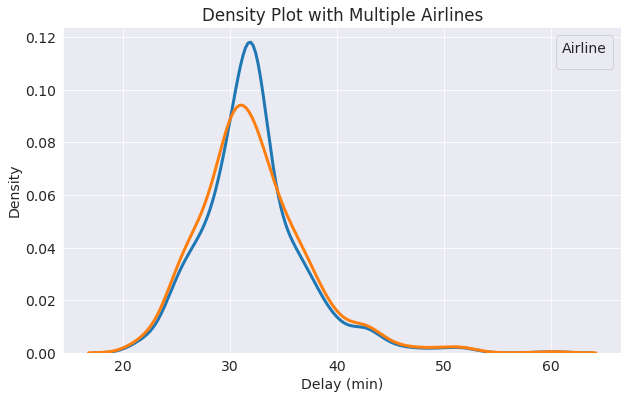

In [83]:
# Draw the density plot
sns.distplot(df_2018['Age'].fillna( df_2018['Age'].mean()), hist = False, kde = True, kde_kws = {'linewidth': 3})
sns.distplot(df_2018['Age'].fillna(np.median(df_2018['Age'])), hist = False, kde = True, kde_kws = {'linewidth': 3})
    
# Plot formatting
plt.legend(prop={'size': 16}, title = 'Airline')
plt.title('Density Plot with Multiple Airlines')
plt.xlabel('Delay (min)')
plt.ylabel('Density')

In [53]:
type(df_2018["Age"].to_numpy())

numpy.ndarray

In [48]:
df_2018["Age"].dropna()

0      43.0
1      33.0
2      32.0
3      25.0
4      39.0
       ... 
753    33.0
755    30.0
756    52.0
760    40.0
764    31.0
Name: Age, Length: 672, dtype: float64

In [27]:
# salary_2018_report = sv.analyze(df_2018, target_feat="Current Salary")
# salary_2018_report.show_notebook()

                                             |          | [  0%]   00:00 -> (? left)

ValueError: ignored